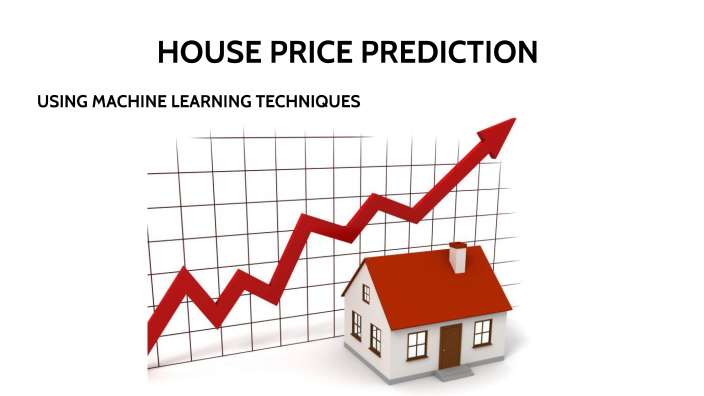

# Importing All the necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [2]:
dataset = pd.read_csv('USA_Housing.csv')
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Data Exploration

In [3]:
# Shape:
dataset.shape

(5000, 7)

In [4]:
# Columns:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# EDA and Pre-Processing of Data

### Distribution of Price column

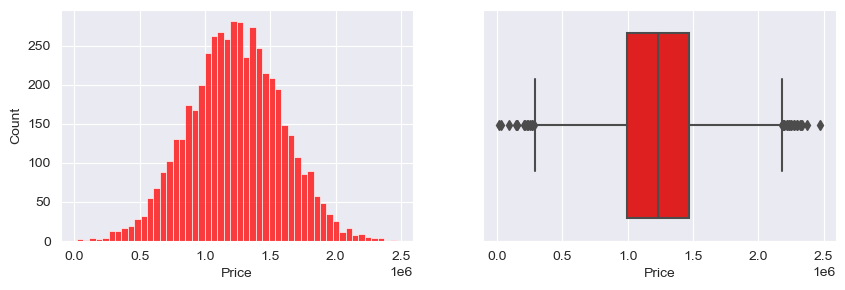

In [7]:
plt.figure(figsize=(10,3))

plt.subplot(121)
sns.histplot(dataset, x='Price', bins=50, color='r')

plt.subplot(122)
sns.boxplot(dataset, x='Price',  color='r');

### Avg. Area House Age Vs Price

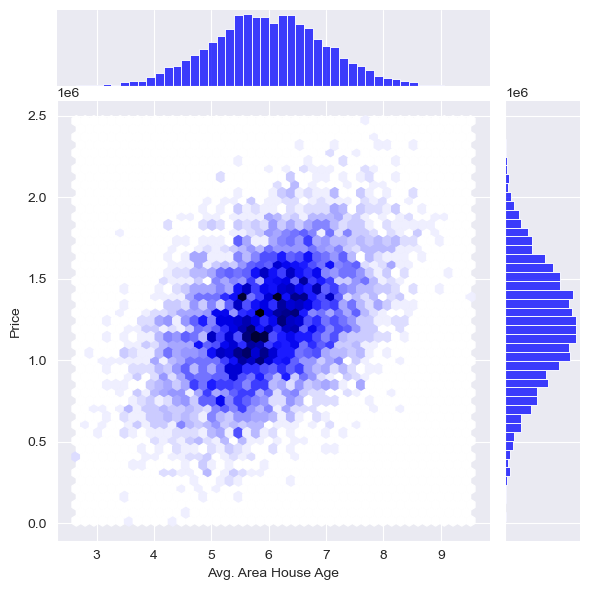

In [8]:
sns.jointplot(dataset, x='Avg. Area House Age', y='Price', kind='hex', color='b');

### Avg. Area Income Vs Price

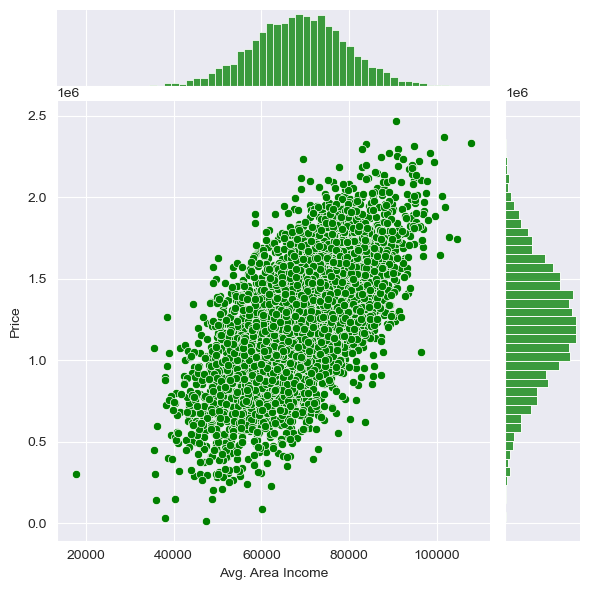

In [9]:
sns.jointplot(dataset, x='Avg. Area Income', y='Price', color='g');

### Correlation among all the columns

<Figure size 1200x800 with 0 Axes>

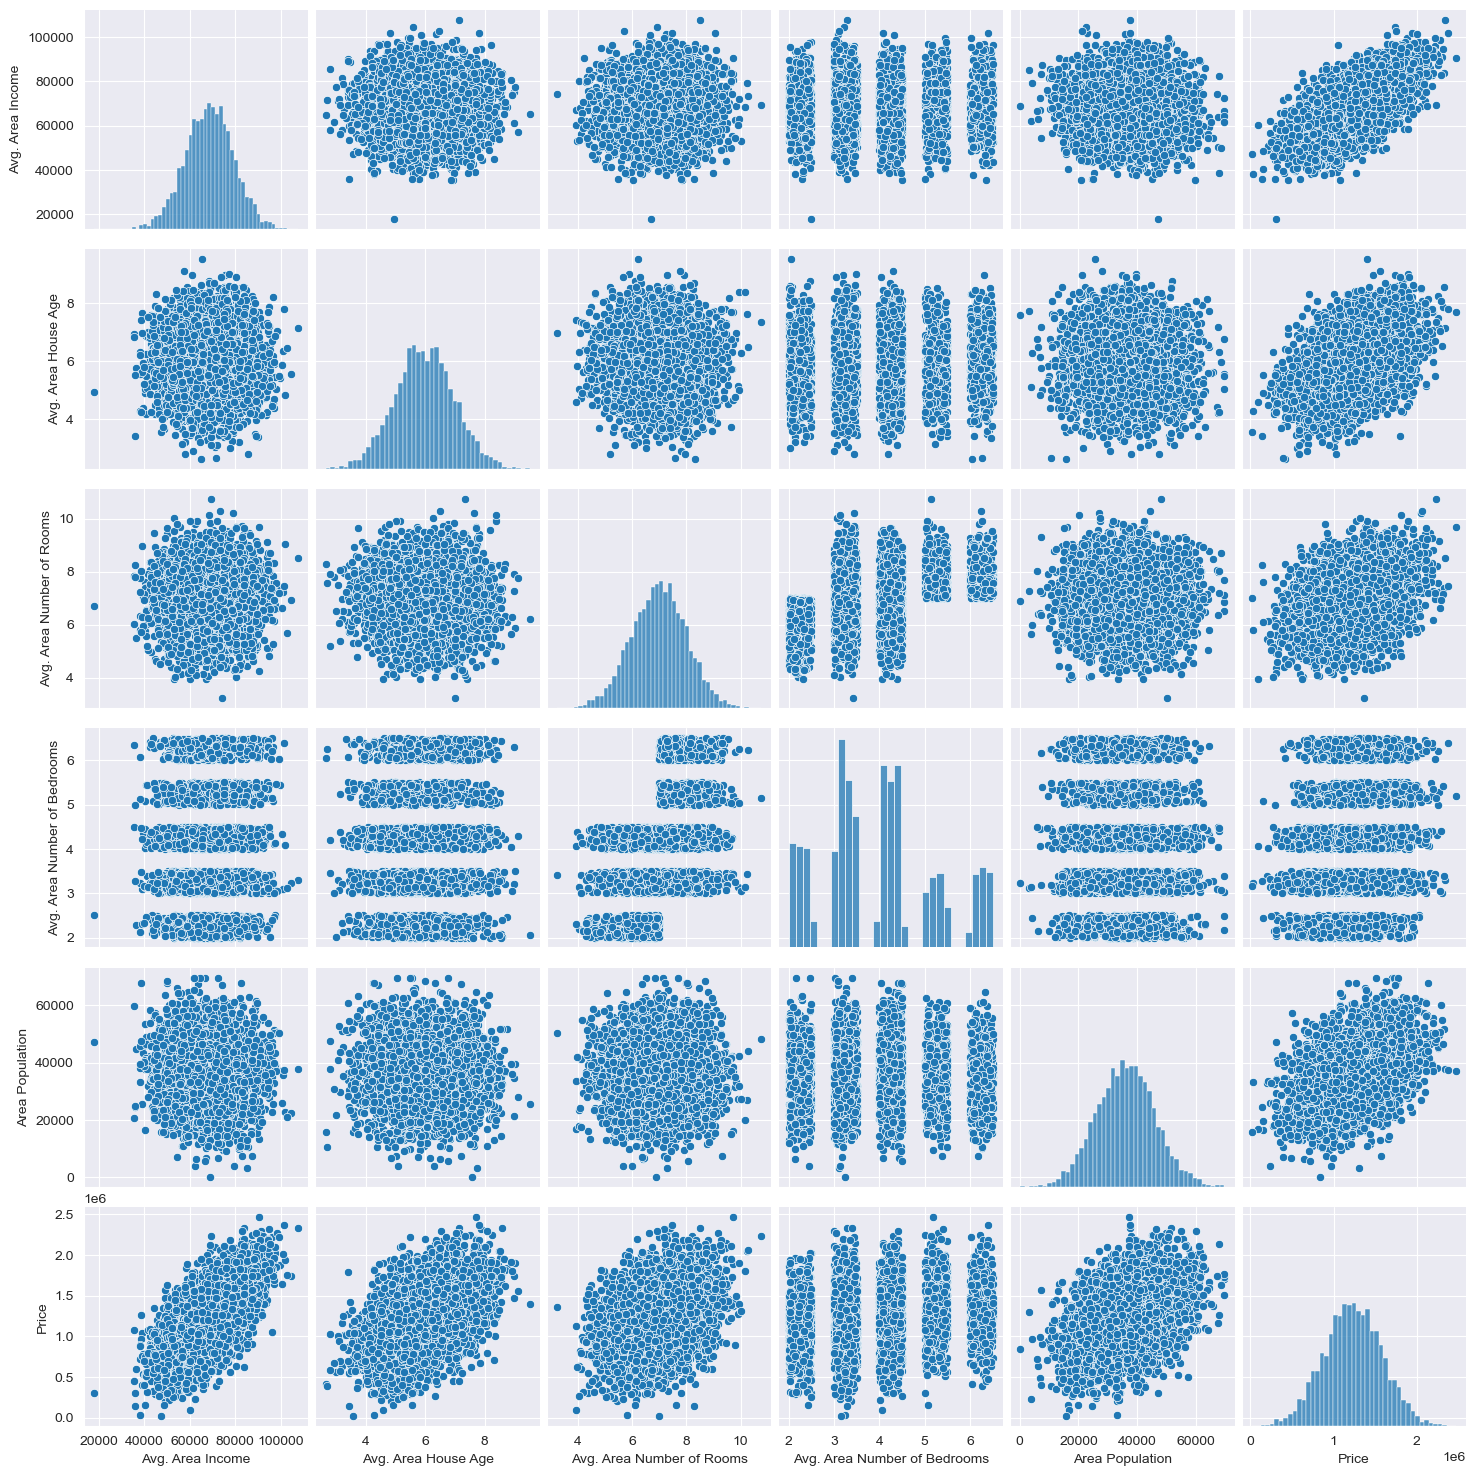

In [10]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset);

### Distribution of all the columns

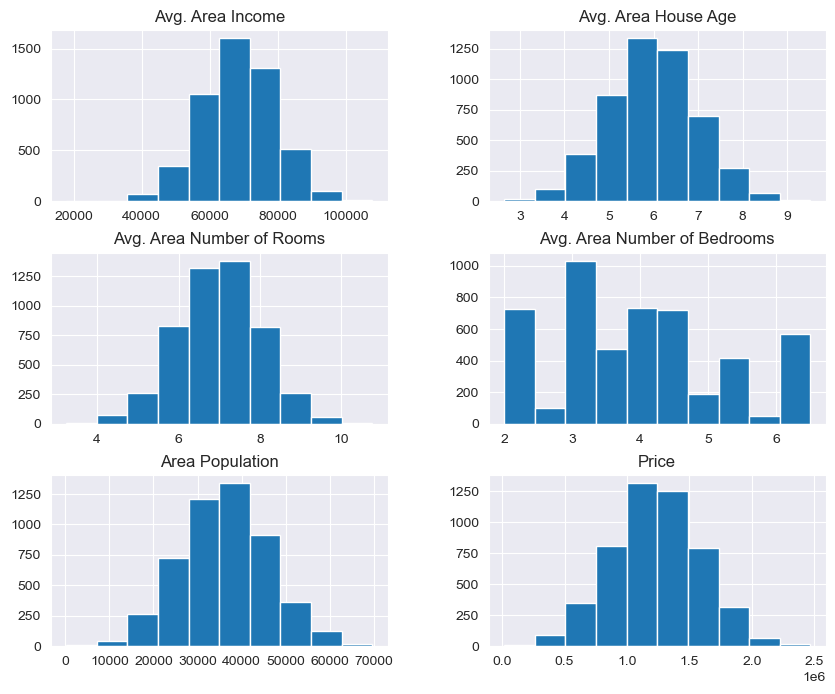

In [11]:
dataset.hist(figsize=(10,8));

### Visualising Correlation

In [12]:
dataset.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


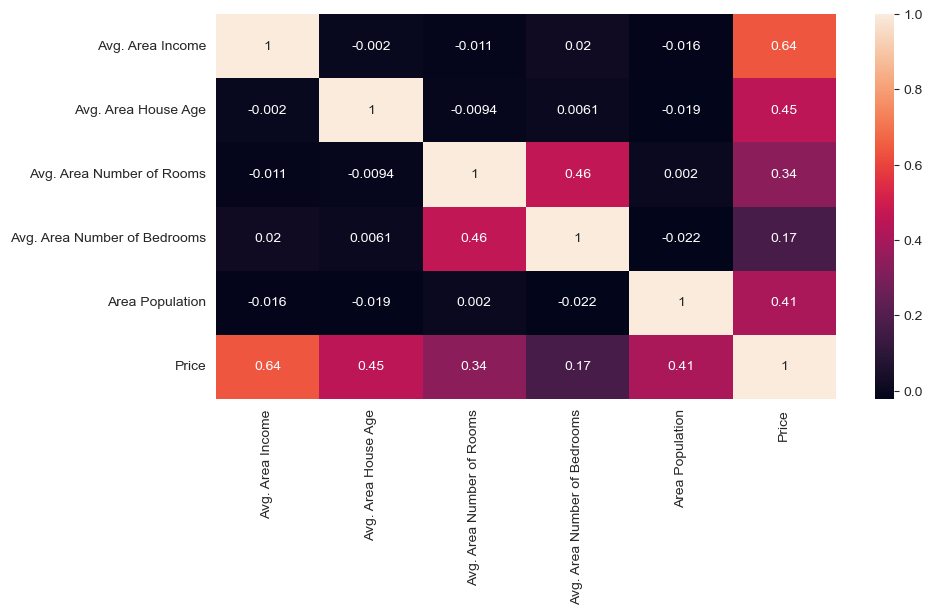

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True);

## Dividing Dataset in to features and target variable

In [14]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y = dataset['Price']

## Split the dataset into train and test

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [16]:
Y_train.head()

3413    1.305210e+06
1610    1.400961e+06
3459    1.048640e+06
4293    1.231157e+06
1039    1.391233e+06
Name: Price, dtype: float64

In [17]:
Y_train.shape

(4000,)

In [18]:
Y_test.head()

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
Name: Price, dtype: float64

In [19]:
Y_test.shape

(1000,)

## Standardizing the data

In [20]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.fit_transform(X_test)

In [21]:
X_train_scal

array([[ 0.05569623,  0.65886183, -0.86300913,  0.29911519,  0.06391981],
       [-0.05545523, -0.58559522,  2.37598858,  1.2000951 ,  0.69883088],
       [-1.11165023, -0.48032202,  0.13621855,  1.73581289,  1.14379364],
       ...,
       [-1.20704442, -2.26895761, -0.11765963, -1.34862286,  2.71900465],
       [-0.50898477, -0.03604344, -1.07361484,  0.11242565, -0.34813857],
       [ 0.62279188,  1.69958661,  1.456617  ,  0.29911519,  2.01048875]])

In [22]:
X_test_scal

array([[-0.21555096, -0.281372  ,  0.77408385,  0.20931536,  0.07088885],
       [-0.64310056, -1.06017806,  0.41824478,  1.74293863, -1.01812409],
       [ 0.42413203,  0.75165241,  1.2987239 , -0.58171138,  0.71366541],
       ...,
       [ 0.25042527, -0.08048033,  0.40212954, -0.04897908,  0.15625295],
       [ 1.69352407, -0.96166121,  0.18304551,  1.07298741, -2.88549085],
       [ 0.11007237, -0.14440016, -0.20680012, -1.2920211 , -0.80666516]])

### Till now we have completed all the Data Pre-Processing steps. Now the data is ready for model building

# Model Building and Evaluation

In [23]:
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as mt

def cross_val(model):
    k=10
    kfold=KFold(n_splits=k, shuffle=True, random_state=45)
    vali=cross_val_score(model, X_train_scal,Y_train, cv=kfold)
    return vali.mean()

def success(true_,pred):
    rmse=mt.mean_absolute_error(true_,pred)
    r2=mt.r2_score(true_,pred)
    return[rmse,r2]

## Trying different types of model

In [24]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



li_model=LinearRegression()
li_model.fit(X_train_scal,Y_train)
li_pred = li_model.predict(X_test_scal)

svm_model= SVR()
svm_model.fit(X_train_scal,Y_train)
svm_pred = svm_model.predict(X_test_scal)

lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train_scal,Y_train)
lasso_pred = lasso_model.predict(X_test_scal)

rf_model=RandomForestRegressor(n_estimators=50)
rf_model.fit(X_train_scal,Y_train)
rf_pred = rf_model.predict(X_test_scal)

xg_model=XGBRegressor()
xg_model.fit(X_train_scal,Y_train)
xg_pred = xg_model.predict(X_test_scal)


In [25]:
result=[["Linear model", success(Y_test,li_pred)[0], success(Y_test,li_pred)[1], cross_val(li_model)],
        ["Support Vector model", success(Y_test,svm_pred)[0], success(Y_test,svm_pred)[1], cross_val(svm_model)],
        ["Lasso model", success(Y_test,lasso_pred)[0], success(Y_test,lasso_pred)[1], cross_val(lasso_model)],
        ["RandomForest model", success(Y_test,rf_pred)[0], success(Y_test,rf_pred)[1], cross_val(rf_model)],
        ["XGBoost model", success(Y_test,xg_pred)[0], success(Y_test,xg_pred)[1], cross_val(xg_model)]]


pd.options.display.float_format="{:.4f}".format

result=pd.DataFrame(result,columns=["Model","MAE","R2","Verification"])
result

,Model,MAE,R2,Verification
0,Linear model,82295.4978,0.9183,0.9165
1,Support Vector model,286137.8109,-0.0006,-0.0016
2,Lasso model,82295.5068,0.9183,0.9165
3,RandomForest model,98565.6712,0.8784,0.8808
4,XGBoost model,102525.1997,0.8707,0.8759


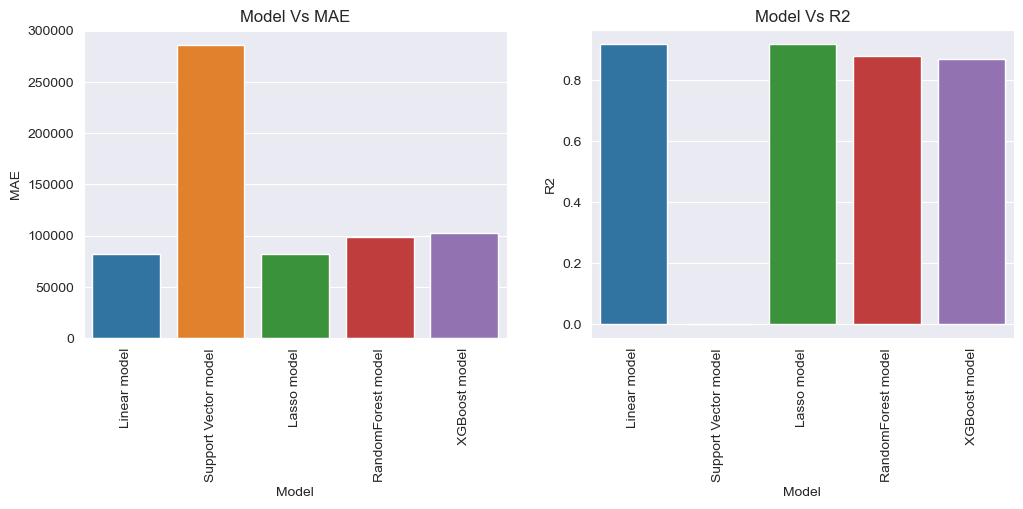

In [26]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.xticks(rotation=90)
plt.title('Model Vs MAE')
sns.barplot(x=result['Model'], y=result['MAE'])

plt.subplot(122)
plt.xticks(rotation=90)
plt.title('Model Vs R2')
sns.barplot(x=result['Model'], y=result['R2']);

### Linear Regression is giving us best Accuracy with low MAE. So, we can built our final model using Linear Regression.

In [27]:
model = LinearRegression()
model.fit(X_train_scal, Y_train)

LinearRegression()

In [28]:
Y_pred = model.predict(X_test_scal)

In [29]:
df = pd.DataFrame()

df['Actual_Price'] = Y_test
df['Predicted_Price'] = Y_pred
df['Difference'] = (df['Actual_Price']-df['Predicted_Price'])

df.head()

,Actual_Price,Predicted_Price,Difference
1718,1251688.6157,1237794.7616,13893.8541
2511,873048.3196,807875.3706,65172.9490
345,1696977.6628,1711953.5693,-14975.9065
2521,1063964.2879,955131.9614,108832.3265
54,948788.2757,978003.1335,-29214.8578


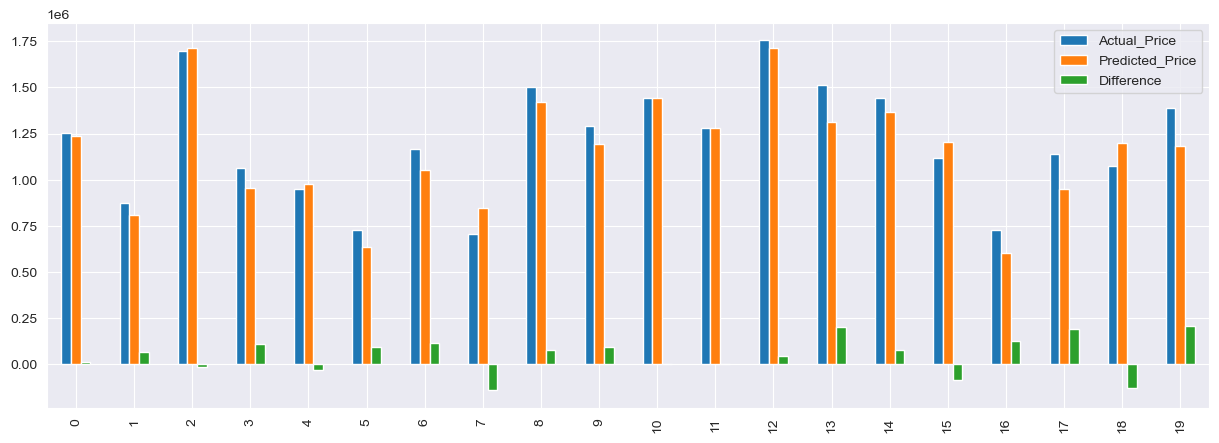

In [30]:
df.head(20).reset_index().plot(x=None,y=['Actual_Price','Predicted_Price','Difference'],kind='bar', figsize=(15,5))
plt.show()

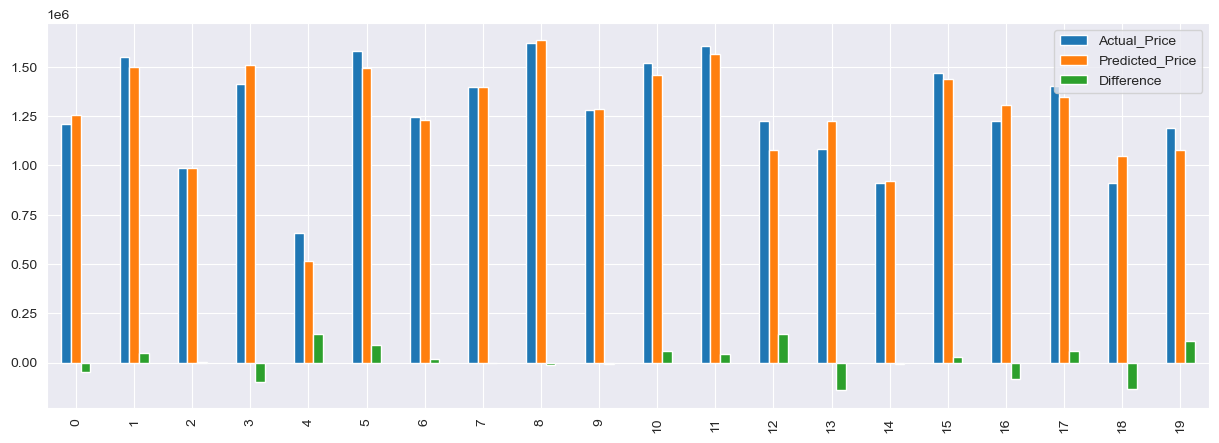

In [31]:
df.tail(20).reset_index().plot(x=None,y=['Actual_Price','Predicted_Price','Difference'],kind='bar', figsize=(15,5))
plt.show()

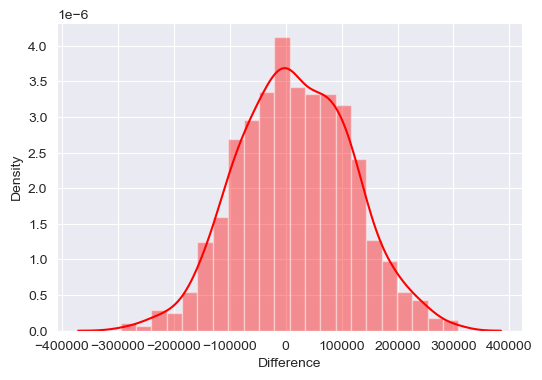

In [32]:
plt.figure(figsize=(6,4))
sns.distplot(df['Difference'], color='r');

**The error distribution is normal**

In [33]:
# Accuracy and Mean Absolute Error:

from sklearn.metrics import r2_score, mean_absolute_error

print("Accuracy: ", r2_score(Y_test, Y_pred)*100)
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))

Accuracy:  91.8292817939292
Mean Absolute Error:  82295.49779231752


### The model is giving the accuracy of 91.83%.

# Saving the model

In [34]:
# Saving model as a pickle file:

import pickle
with open("House_Price.pickle",'wb') as file:
    pickle.dump(model, file)


In [35]:
file.close()

### Here our model is ready for the deployment purpose